In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from numpy import pi
from qiskit.circuit.library import QFT
from qiskit.visualization import *
from qiskit.circuit.library import MCXGate


backend = Aer.get_backend('qasm_simulator')


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def comparison(qubit0,qubit1,qubit2,qubit3,qubit4,qubit5,anc):
    
    qc.mcx(target_qubit=qubit2, control_qubits=[qubit0])
    qc.mcx(target_qubit=qubit3, control_qubits=[qubit1])
    qc.x(qubit2)
    qc.x(qubit3)
    
    qc.mcx(target_qubit=anc, control_qubits=[qubit2,qubit3])
    qc.x(qubit2)
    qc.x(qubit3)
    qc.mcx(target_qubit=qubit3, control_qubits=[qubit1])
    qc.mcx(target_qubit=qubit2, control_qubits=[qubit0])
    
    qc.mcx(target_qubit=qubit4, control_qubits=[qubit0])
    qc.mcx(target_qubit=qubit5, control_qubits=[qubit1])
    qc.x(qubit4)
    qc.x(qubit5)
    qc.mcx(target_qubit=anc, control_qubits=[qubit4,qubit5])
    qc.x(qubit4)
    qc.x(qubit5)
    
    qc.mcx(target_qubit=qubit5, control_qubits=[qubit1])
    qc.mcx(target_qubit=qubit4, control_qubits=[qubit0])
    qc.mcx(target_qubit=qubit4, control_qubits=[qubit2])
    qc.mcx(target_qubit=qubit5, control_qubits=[qubit3])
    qc.x(qubit4)
    qc.x(qubit5)
    qc.mcx(target_qubit=anc, control_qubits=[qubit4,qubit5])
    qc.x(qubit4)
    qc.x(qubit5)
    
    qc.mcx(target_qubit=qubit5, control_qubits=[qubit3])
    qc.mcx(target_qubit=qubit4, control_qubits=[qubit2])
    qc.x(anc)

In [9]:
sophia_dokument = QuantumRegister(2, 'sophia_dokument')
sophia_zeit = QuantumRegister(2, 'sophia_zeit')
sophia_drucker = QuantumRegister(2, 'sophia_drucker')

korbinian_dokument = QuantumRegister(2, 'korbinian_dokument')
korbinian_zeit = QuantumRegister(2, 'korbinian_zeit')
korbinian_drucker = QuantumRegister(2, 'korbinian_drucker')

michelle_dokument = QuantumRegister(2, 'michelle_dokument')
michelle_zeit = QuantumRegister(2, 'michelle_zeit')
michelle_drucker = QuantumRegister(2, 'michelle_drucker')

plus_eins=QuantumRegister(1,"plus_eins")
ancilla = QuantumRegister(4, "ancilla")
#flip = QuantumRegister(1, "flip")
c = ClassicalRegister(18, 'c')
qft_invers =QFT(4, inverse = True,do_swaps= False)
qft = QFT(4, do_swaps= False)

qc = QuantumCircuit(sophia_dokument, sophia_zeit, sophia_drucker, korbinian_dokument, korbinian_zeit, korbinian_drucker, michelle_dokument, michelle_zeit, michelle_drucker,plus_eins, ancilla, c)

def increment():    
    qc.append(qft, ancilla)
    for i in range(4):
        qc.cp((2*pi)/2**(i+1),plus_eins,ancilla[i])
    qc.append(qft_invers, ancilla)
    
def decrement():    
    qc.append(qft, ancilla)
    for i in range(4):
        qc.cp(-(2*pi)/2**(i+1),plus_eins,ancilla[i])
        

  
    qc.append(qft_invers, ancilla)


for x in range(18):
    qc.h(x)
#qc.x(flip)
#qc.h(flip)
qc.barrier()
qc.barrier()

for x in range(401):
    #first constraint "Korbinian hat um 12:43 Druckauftrag gesendet. Das Dokument wird nicht mit Manet gedruckt.
    qc.mcx(target_qubit=plus_eins, control_qubits=[korbinian_zeit[0],korbinian_zeit[1], korbinian_drucker[0]])
    qc.barrier()
    #
    #
    increment()
    qc.barrier()
    qc.mcx(target_qubit=plus_eins, control_qubits=[korbinian_zeit[0],korbinian_zeit[1], korbinian_drucker[0]])
    qc.barrier()
    qc.barrier()
    
    #second constraint "Das Dokument QCPrak wird um 12:36 gedruckt.
    qc.x(sophia_dokument[1])
    qc.x(sophia_zeit[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0],sophia_dokument[1],sophia_zeit[0],sophia_zeit[1]])
    qc.x(sophia_dokument[1])
    qc.x(sophia_zeit[1])
    
    qc.x(michelle_dokument[1])
    qc.x(michelle_zeit[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_zeit[0],michelle_zeit[1]])
    qc.x(michelle_dokument[1])
    qc.x(michelle_zeit[1])
    
    qc.barrier()
    #
    #
    increment()
    qc.barrier()
    qc.x(sophia_dokument[1])
    qc.x(sophia_zeit[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0],sophia_dokument[1],sophia_zeit[0],sophia_zeit[1]])
    qc.x(sophia_dokument[1])
    qc.x(sophia_zeit[1])
    
    qc.x(michelle_dokument[1])
    qc.x(michelle_zeit[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_zeit[0],michelle_zeit[1]])
    qc.x(michelle_dokument[1])
    qc.x(michelle_zeit[1])
    
    
    qc.barrier()
    qc.barrier()
    
    
    #third constraint "Der Druckauftrag mit den Namen "skript" wird mit Bullock gedruckt.
    qc.x(sophia_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0],sophia_dokument[1],sophia_drucker[0],sophia_drucker[1]])
    qc.x(sophia_dokument[0])
    
    qc.x(korbinian_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[korbinian_dokument[0],korbinian_dokument[1],korbinian_drucker[0],korbinian_drucker[1]])
    qc.x(korbinian_dokument[0])
    
    qc.x(michelle_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_drucker[0],michelle_drucker[1]])
    qc.x(michelle_dokument[0])
    
    qc.x(sophia_dokument[0])
    qc.x(korbinian_dokument[0])
    qc.x(michelle_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_drucker[0],michelle_drucker[1],
                                                    sophia_dokument[0],sophia_dokument[1],sophia_drucker[0],sophia_drucker[1],
                                                    korbinian_dokument[0],korbinian_dokument[1],korbinian_drucker[0],korbinian_drucker[1]])
    qc.x(sophia_dokument[0])
    qc.x(korbinian_dokument[0])
    qc.x(michelle_dokument[0])
    qc.barrier()
    #
    #
    increment()
    qc.barrier()
    qc.x(sophia_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0],sophia_dokument[1],sophia_drucker[0],sophia_drucker[1]])
    qc.x(sophia_dokument[0])
    
    qc.x(korbinian_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[korbinian_dokument[0],korbinian_dokument[1],korbinian_drucker[0],korbinian_drucker[1]])
    qc.x(korbinian_dokument[0])
    
    qc.x(michelle_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_drucker[0],michelle_drucker[1]])
    qc.x(michelle_dokument[0])
    
    qc.x(sophia_dokument[0])
    qc.x(korbinian_dokument[0])
    qc.x(michelle_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_drucker[0],michelle_drucker[1],
                                                    sophia_dokument[0],sophia_dokument[1],sophia_drucker[0],sophia_drucker[1],
                                                    korbinian_dokument[0],korbinian_dokument[1],korbinian_drucker[0],korbinian_drucker[1]])
    qc.x(sophia_dokument[0])
    qc.x(korbinian_dokument[0])
    qc.x(michelle_dokument[0])
    qc.barrier()
    qc.barrier()
    #fourth constraint "Sophias Dokument hat skript oder QC_Prak"
    
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0]])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[1]])   
    qc.barrier()
    #
    #
    increment()
    #
    #
    qc.barrier()
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0]])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[1]])   
    qc.barrier()
    qc.barrier()
    
    
    #fifth constraint "Ein Druckauftrag wurde um 12:36 an Mergenthaler gesendet"
    qc.x(michelle_zeit[1])
    qc.x(michelle_drucker[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_zeit[0],michelle_zeit[1],michelle_drucker[0],michelle_drucker[1]])
    qc.x(michelle_drucker[1])
    qc.x(michelle_zeit[1])
    qc.barrier()
    qc.x(sophia_zeit[1])
    qc.x(sophia_drucker[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_zeit[0],sophia_zeit[1],sophia_drucker[0],sophia_drucker[1]])
    qc.x(sophia_drucker[1])
    qc.x(sophia_zeit[1])
    qc.barrier()

    #
    #
    increment()
    #
    #
    qc.barrier()
    qc.x(michelle_zeit[1])
    qc.x(michelle_drucker[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_zeit[0],michelle_zeit[1],michelle_drucker[0],michelle_drucker[1]])
    qc.x(michelle_drucker[1])
    qc.x(michelle_zeit[1])
    qc.barrier()
    qc.x(sophia_zeit[1])
    qc.x(sophia_drucker[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_zeit[0],sophia_zeit[1],sophia_drucker[0],sophia_drucker[1]])
    qc.x(sophia_drucker[1])
    qc.x(sophia_zeit[1]) 
    qc.barrier()
    qc.barrier()                                           
    
    #sixth constraint "Vergelich"
    comparison(sophia_dokument[0],sophia_dokument[1],korbinian_dokument[0],korbinian_dokument[1],michelle_dokument[0],michelle_dokument[1],plus_eins)
    qc.barrier()
    #
    #
    increment()
    #
    #
    qc.barrier()
    comparison(sophia_dokument[0],sophia_dokument[1],korbinian_dokument[0],korbinian_dokument[1],michelle_dokument[0],michelle_dokument[1],plus_eins)
    
    qc.barrier()
    comparison(sophia_zeit[0],sophia_zeit[1],korbinian_zeit[0],korbinian_zeit[1],michelle_zeit[0],michelle_zeit[1],plus_eins)
    qc.barrier()
    #
    #
    increment()
    #
    #
    qc.barrier()
    comparison(sophia_zeit[0],sophia_zeit[1],korbinian_zeit[0],korbinian_zeit[1],michelle_zeit[0],michelle_zeit[1],plus_eins)
    qc.barrier()  
    comparison(sophia_drucker[0],sophia_drucker[1],korbinian_drucker[0],korbinian_drucker[1],michelle_drucker[0],michelle_drucker[1],plus_eins)
    qc.barrier()
    #
    #
    increment()
    qc.barrier()  
    comparison(sophia_drucker[0],sophia_drucker[1],korbinian_drucker[0],korbinian_drucker[1],michelle_drucker[0],michelle_drucker[1],plus_eins)
    
    qc.barrier()
    qc.barrier()
    
    #seventh constraint "0 ausschleißen"
    
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[0],michelle_drucker[1]])
    qc.barrier()
    #
    #
    increment()
    qc.barrier()
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[0],michelle_drucker[1]])
    qc.barrier()
    

    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[0],michelle_dokument[1]])   
    qc.barrier()
    #
    #
    increment()
    qc.barrier()
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[0],michelle_dokument[1]])  
    qc.barrier()


    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[0],michelle_zeit[1]])
    qc.barrier()
    #
    #
    increment()
    qc.barrier()
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[0],michelle_zeit[1]])
    qc.barrier()
    qc.barrier()

    
    qc.x(plus_eins)
    
    qc.h(plus_eins)
    #Bitflip
    qc.barrier()
    qc.barrier()   
    qc.x([ancilla[2]])
    
    qc.mcx(target_qubit=plus_eins, control_qubits=[ancilla[0],ancilla[1],ancilla[2],ancilla[3]])

    qc.x(ancilla[2])
    qc.barrier()
    qc.barrier()
    qc.h(plus_eins)
    qc.x(plus_eins)
    
 
    qc.barrier()
    qc.barrier()
    
    ########SPIEGELUNG
    #first constraint "Korbinian hat um 12:43 Druckauftrag gesendet. Das Dokument wird nicht mit Manet gedruckt.
    qc.mcx(target_qubit=plus_eins, control_qubits=[korbinian_zeit[0],korbinian_zeit[1], korbinian_drucker[0]])
    qc.barrier()
    #
    #
    decrement()

    qc.barrier()
    qc.mcx(target_qubit=plus_eins, control_qubits=[korbinian_zeit[0],korbinian_zeit[1], korbinian_drucker[0]])
    qc.barrier()
    qc.barrier()
    
    #second constraint "Das Dokument QCPrak wird um 12:36 gedruckt.
    qc.x(sophia_dokument[1])
    qc.x(sophia_zeit[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0],sophia_dokument[1],sophia_zeit[0],sophia_zeit[1]])
    qc.x(sophia_dokument[1])
    qc.x(sophia_zeit[1])
    
    qc.x(michelle_dokument[1])
    qc.x(michelle_zeit[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_zeit[0],michelle_zeit[1]])
    qc.x(michelle_dokument[1])
    qc.x(michelle_zeit[1])
    qc.barrier()
    #
    #
    decrement()
    qc.barrier()
    qc.x(sophia_dokument[1])
    qc.x(sophia_zeit[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0],sophia_dokument[1],sophia_zeit[0],sophia_zeit[1]])
    qc.x(sophia_dokument[1])
    qc.x(sophia_zeit[1])
    
    qc.x(michelle_dokument[1])
    qc.x(michelle_zeit[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_zeit[0],michelle_zeit[1]])
    qc.x(michelle_dokument[1])
    qc.x(michelle_zeit[1])
    
    qc.barrier()
    qc.barrier()
    
    
    #third constraint "Der Druckauftrag mit den Namen "skript" wird mit Bullock gedruckt.
    qc.x(sophia_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0],sophia_dokument[1],sophia_drucker[0],sophia_drucker[1]])
    qc.x(sophia_dokument[0])
    
    qc.x(korbinian_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[korbinian_dokument[0],korbinian_dokument[1],korbinian_drucker[0],korbinian_drucker[1]])
    qc.x(korbinian_dokument[0])
    
    qc.x(michelle_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_drucker[0],michelle_drucker[1]])
    qc.x(michelle_dokument[0])
    
    qc.x(sophia_dokument[0])
    qc.x(korbinian_dokument[0])
    qc.x(michelle_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_drucker[0],michelle_drucker[1],
                                                    sophia_dokument[0],sophia_dokument[1],sophia_drucker[0],sophia_drucker[1],
                                                    korbinian_dokument[0],korbinian_dokument[1],korbinian_drucker[0],korbinian_drucker[1]])
    qc.x(sophia_dokument[0])
    qc.x(korbinian_dokument[0])
    qc.x(michelle_dokument[0])
    qc.barrier()
    #
    #
    decrement()
    qc.barrier()
    qc.x(sophia_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0],sophia_dokument[1],sophia_drucker[0],sophia_drucker[1]])
    qc.x(sophia_dokument[0])
    
    qc.x(korbinian_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[korbinian_dokument[0],korbinian_dokument[1],korbinian_drucker[0],korbinian_drucker[1]])
    qc.x(korbinian_dokument[0])
    
    qc.x(michelle_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_drucker[0],michelle_drucker[1]])
    qc.x(michelle_dokument[0])
    
    qc.x(sophia_dokument[0])
    qc.x(korbinian_dokument[0])
    qc.x(michelle_dokument[0])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_dokument[0],michelle_dokument[1],michelle_drucker[0],michelle_drucker[1],
                                                    sophia_dokument[0],sophia_dokument[1],sophia_drucker[0],sophia_drucker[1],
                                                    korbinian_dokument[0],korbinian_dokument[1],korbinian_drucker[0],korbinian_drucker[1]])
    qc.x(sophia_dokument[0])
    qc.x(korbinian_dokument[0])
    qc.x(michelle_dokument[0])
    qc.barrier()
    qc.barrier()
    #fourth constraint "Sophias Dokument hat skript oder QC_Prak"
    
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0]])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[1]])  
    qc.barrier()
    #
    #
    decrement()
    qc.barrier()
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[0]])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_dokument[1]]) 
    
    qc.barrier()
    qc.barrier()
    
    
    #fifth constraint "Ein Druckauftrag wurde um 12:36 an Mergenthaler gesendet"
    qc.x(michelle_zeit[1])
    qc.x(michelle_drucker[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_zeit[0],michelle_zeit[1],michelle_drucker[0],michelle_drucker[1]])
    qc.x(michelle_drucker[1])
    qc.x(michelle_zeit[1])
    qc.barrier()
    qc.x(sophia_zeit[1])
    qc.x(sophia_drucker[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_zeit[0],sophia_zeit[1],sophia_drucker[0],sophia_drucker[1]])
    qc.x(sophia_drucker[1])
    qc.x(sophia_zeit[1])
    qc.barrier()
    #
    #
    decrement()
    qc.barrier()
    qc.x(michelle_zeit[1])
    qc.x(michelle_drucker[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[michelle_zeit[0],michelle_zeit[1],michelle_drucker[0],michelle_drucker[1]])
    qc.x(michelle_drucker[1])
    qc.x(michelle_zeit[1])
    qc.barrier()
    qc.x(sophia_zeit[1])
    qc.x(sophia_drucker[1])
    qc.mcx(target_qubit=plus_eins, control_qubits=[sophia_zeit[0],sophia_zeit[1],sophia_drucker[0],sophia_drucker[1]])
    qc.x(sophia_drucker[1])
    qc.x(sophia_zeit[1])
    
    qc.barrier()
    qc.barrier()                                           
    
    #sixth constraint "Vergelich"
    comparison(sophia_dokument[0],sophia_dokument[1],korbinian_dokument[0],korbinian_dokument[1],michelle_dokument[0],michelle_dokument[1],plus_eins)
    qc.barrier()
    #
    #
    decrement()
    qc.barrier()
    comparison(sophia_dokument[0],sophia_dokument[1],korbinian_dokument[0],korbinian_dokument[1],michelle_dokument[0],michelle_dokument[1],plus_eins)
    qc.barrier()
    comparison(sophia_zeit[0],sophia_zeit[1],korbinian_zeit[0],korbinian_zeit[1],michelle_zeit[0],michelle_zeit[1],plus_eins)
    qc.barrier()
    #
    #
    decrement()
    qc.barrier()
    comparison(sophia_zeit[0],sophia_zeit[1],korbinian_zeit[0],korbinian_zeit[1],michelle_zeit[0],michelle_zeit[1],plus_eins)
    qc.barrier()   
    comparison(sophia_drucker[0],sophia_drucker[1],korbinian_drucker[0],korbinian_drucker[1],michelle_drucker[0],michelle_drucker[1],plus_eins)
    qc.barrier()
    #
    #
    decrement()
    qc.barrier()
    comparison(sophia_drucker[0],sophia_drucker[1],korbinian_drucker[0],korbinian_drucker[1],michelle_drucker[0],michelle_drucker[1],plus_eins)
    qc.barrier()
    qc.barrier()
    
    #seventh constraint "0 ausschleißen"
    
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[0],michelle_drucker[1]])
    qc.barrier()
    #
    #
    decrement()
    qc.barrier()
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_drucker[0],michelle_drucker[1]])
    qc.barrier()
    
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[0],michelle_dokument[1]])   
    qc.barrier()
    #
    #
    decrement()
    qc.barrier()
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_dokument[0],michelle_dokument[1]]) 
    qc.barrier()

    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[0],michelle_zeit[1]])
    qc.barrier()
    #
    #
    decrement()
    qc.barrier()
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[0]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[1]])
    qc.mcx(target_qubit=plus_eins,control_qubits=[michelle_zeit[0],michelle_zeit[1]])
    qc.barrier()
    
    qc.barrier()
    qc.barrier()
    
    
    ####Diffusor
    qc.h(sophia_dokument)
    qc.h(sophia_zeit)
    qc.h(sophia_drucker)
    qc.h(korbinian_dokument)
    qc.h(korbinian_zeit)
    qc.h(korbinian_drucker)
    qc.h(michelle_dokument)
    qc.h(michelle_zeit)
    qc.h(michelle_drucker)
    
    qc.x(sophia_dokument)
    qc.x(sophia_zeit)
    qc.x(sophia_drucker)
    qc.x(korbinian_dokument)
    qc.x(korbinian_zeit)
    qc.x(korbinian_drucker)
    qc.x(michelle_dokument)
    qc.x(michelle_zeit)
    qc.x(michelle_drucker)
    
    qc.h(michelle_drucker[1])
    qc.mcx(target_qubit=michelle_drucker[1],control_qubits=[sophia_dokument[0],sophia_dokument[1],korbinian_dokument[0],korbinian_dokument[1],michelle_dokument[0],
                                                            michelle_dokument[1],sophia_zeit[0],sophia_zeit[1],korbinian_zeit[0],korbinian_zeit[1],michelle_zeit[0],
                                                            michelle_zeit[1],sophia_drucker[0],sophia_drucker[1],korbinian_drucker[0],korbinian_drucker[1],michelle_drucker[0]])
    qc.h(michelle_drucker[1])
    
    qc.x(sophia_dokument)
    qc.x(sophia_zeit)
    qc.x(sophia_drucker)
    qc.x(korbinian_dokument)
    qc.x(korbinian_zeit)
    qc.x(korbinian_drucker)
    qc.x(michelle_dokument)
    qc.x(michelle_zeit)
    qc.x(michelle_drucker)
    
    qc.h(sophia_dokument)
    qc.h(sophia_zeit)
    qc.h(sophia_drucker)
    qc.h(korbinian_dokument)
    qc.h(korbinian_zeit)
    qc.h(korbinian_drucker)
    qc.h(michelle_dokument)
    qc.h(michelle_zeit)
    qc.h(michelle_drucker)
         
    qc.barrier()
    qc.barrier()
    
    
qc.measure([sophia_dokument[0],sophia_dokument[1],sophia_zeit[0],sophia_zeit[1],sophia_drucker[0],sophia_drucker[1],
            korbinian_dokument[0],korbinian_dokument[1],korbinian_zeit[0],korbinian_zeit[1],korbinian_drucker[0],korbinian_drucker[1],
            michelle_dokument[0],michelle_dokument[1],michelle_zeit[0], michelle_zeit[1],michelle_drucker[0],michelle_drucker[1]],c)  
                                                                             
#qc.draw()

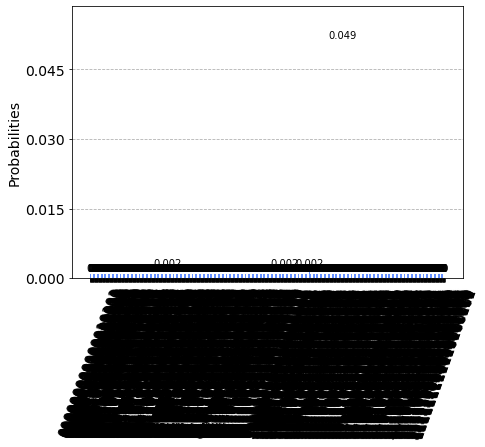

In [10]:
result = execute(qc, backend).result()
plot_histogram(result.get_counts())

In [11]:
sorted(result.get_counts().items(), key=lambda x:x[1], reverse=True)

[('101011111110010101', 50),
 ('100101111010100100', 2),
 ('001110010000101000', 2),
 ('100001111100011100', 2),
 ('011000100110000100', 1),
 ('001010111101111111', 1),
 ('111000011000110101', 1),
 ('111011111000101010', 1),
 ('101011001110001011', 1),
 ('000000111010011011', 1),
 ('110001000001001010', 1),
 ('010110011001110110', 1),
 ('101100110001010101', 1),
 ('101100011001101010', 1),
 ('111000011110001000', 1),
 ('000011000100101110', 1),
 ('000111010110001110', 1),
 ('000000000100110010', 1),
 ('100010010011011110', 1),
 ('001110101111101111', 1),
 ('110000010000111111', 1),
 ('010100100100100100', 1),
 ('010100110011101011', 1),
 ('000000011110100010', 1),
 ('001001101000011010', 1),
 ('010100111011011101', 1),
 ('001101010010011100', 1),
 ('000111010111100001', 1),
 ('111100111010010001', 1),
 ('111111100100111100', 1),
 ('010110001011100000', 1),
 ('101011101110000011', 1),
 ('000010000011011000', 1),
 ('100000100010111111', 1),
 ('110001010010101011', 1),
 ('0100100100000101